# KGT COYOTE
###     
###  Kevin, Captain, Thomas team
### Coyote Dog train model, validation and overfitting



## PREPARE
####          
#### Train Coyote Images:  1000
#### Train Dog Images:  10000
#### Test Coyote Images:  245
#### Test Dog Images:  2500

### IMPORT

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


### DIRECTORIES

In [3]:
mix_dir="./COYODOG"
test_dir="./COYODOG"
train_dir="./COYODOG"

train_dir_m = "./COYODOG/trainy"
test_dir_m = "./COYODOG/validy"

train_dir_predict = "./COYODOG/trainy"

test_data = "./DATA/coyodogs"


In [4]:

import os


train_dir_coyote=os.path.join(train_dir,"trainy/coyotes")
train_dir_dog=os.path.join(train_dir,"trainy/dogs")

test_dir_coyote=os.path.join(test_dir,"validy/coyotes")
test_dir_dog=os.path.join(test_dir,"validy/dogs")

In [5]:
train_coyote_fnames = os.listdir( train_dir_coyote )
train_dog_fnames = os.listdir( train_dir_dog )
test_coyote_fnames = os.listdir( test_dir_coyote )
test_dog_fnames = os.listdir( test_dir_dog )

print(train_coyote_fnames[:5])
print(train_dog_fnames[:5])
print(test_coyote_fnames[:5])
print(test_dog_fnames[:5]) 

print("Train data Coyote: ",len(os.listdir(train_dir_coyote)))
print("Train data Dogs: ",len(os.listdir(train_dir_dog)))

print("Test Data Coyote: ",len(os.listdir(test_dir_coyote)))
print("Test Data Dog: ",len(os.listdir(test_dir_dog))) 

['coyote.1.jpg', 'coyote.10.jpg', 'coyote.100.jpg', 'coyote.1000.jpg', 'coyote.101.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg']
['coyote.1001.jpg', 'coyote.1002.jpg', 'coyote.1003.jpg', 'coyote.1004.jpg', 'coyote.1005.jpg']
['dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg', 'dog.10005.jpg']
Train data Coyote:  1000
Train data Dogs:  10000
Test Data Coyote:  245
Test Data Dog:  2500


## VISUALIZE

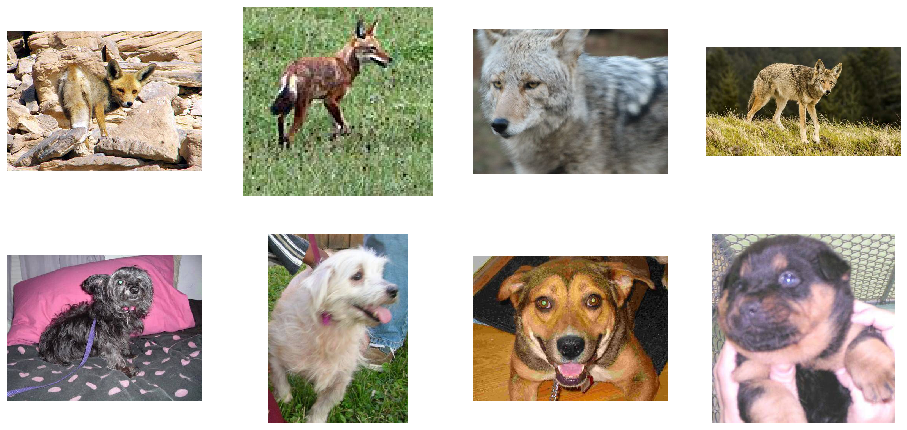

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_cat_pix = [os.path.join(train_dir_coyote, fname) 
                for fname in train_coyote_fnames[ pic_index-4:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dir_dog, fname) 
                for fname in train_dog_fnames[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

## CREATE MODELS  Exploratory and Overfitting (epoch and steps small to quick test)

## Create First Model

### Add layers MODEL

In [7]:
from keras import layers
from keras import models

model = models.Sequential()

Using TensorFlow backend.


In [8]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

####  Train model also use binary_crossentropy for loss and activate with sigmoid.

In [10]:

from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4), 
                metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# Use ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



# train
train_generator = train_datagen.flow_from_directory(
    train_dir_m,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# validate
validation_generator = test_datagen.flow_from_directory(
    test_dir_m,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 11000 images belonging to 2 classes.
Found 2745 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=40,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/10
40/40 [==============================] - 66s 2s/step - loss: 0.3362 - acc: 0.8925 - val_loss: 0.2667 - val_acc: 0.9000
Epoch 2/10
40/40 [==============================] - 65s 2s/step - loss: 0.3128 - acc: 0.9050 - val_loss: 0.4146 - val_acc: 0.9220
Epoch 3/10
40/40 [==============================] - 58s 1s/step - loss: 0.2862 - acc: 0.9062 - val_loss: 0.4091 - val_acc: 0.9066
Epoch 4/10
40/40 [==============================] - 50s 1s/step - loss: 0.3124 - acc: 0.8963 - val_loss: 0.2718 - val_acc: 0.9130
Epoch 5/10
40/40 [==============================] - 49s 1s/step - loss: 0.2658 - acc: 0.9050 - val_loss: 0.3666 - val_acc: 0.9010
Epoch 6/10
40/40 [==============================] - 52s 1s/step - loss: 0.2576 - acc: 0.9112 - val_loss: 0.2040 - val_acc: 0.9218
Epoch 7/10
40/40 [==============================] - 48s 1s/step - loss: 0.2844 - acc: 0.9000 - val_loss: 0.0731 - val_acc: 0.9130
Epoch 8/10
40/40 [==============================] - 46s 1s/step - loss: 0.2437 - acc: 0.9

### COMPILE

In [ ]:
#model.compile(tf.keras.optimizers.Adam(1e-4),tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

### PROCESS IMAGE

### TRAIN MODEL

In [13]:
model.save("initmodel.h5")

###  ACCURACY and LOSS

In [14]:
accuracy=history.history["acc"]
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))

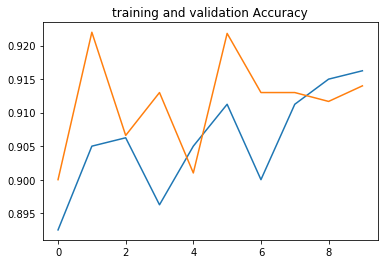

In [15]:
plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

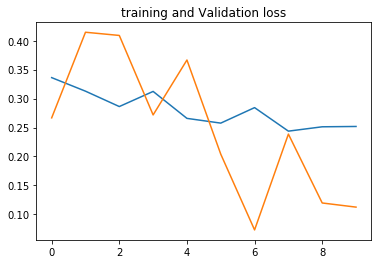

In [16]:
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and Validation loss")
plt.show()

### FIXING OVERFITTING

#### Dropout layer and Augmentation

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [ ]:
# Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    train_dir_m,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir_m,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=60)

Epoch 1/20
60/60 [==============================] - 67s 1s/step - loss: 0.3241 - acc: 0.9008 - val_loss: 0.3505 - val_acc: 0.9142
Epoch 2/20
60/60 [==============================] - 83s 1s/step - loss: 0.3423 - acc: 0.8867 - val_loss: 0.1221 - val_acc: 0.9183
Epoch 3/20
60/60 [==============================] - 68s 1s/step - loss: 0.2527 - acc: 0.9200 - val_loss: 0.3251 - val_acc: 0.9021
Epoch 4/20
60/60 [==============================] - 71s 1s/step - loss: 0.2318 - acc: 0.9242 - val_loss: 0.0399 - val_acc: 0.8992
Epoch 5/20
60/60 [==============================] - 64s 1s/step - loss: 0.2521 - acc: 0.9083 - val_loss: 0.1183 - val_acc: 0.9283
Epoch 6/20
60/60 [==============================] - 68s 1s/step - loss: 0.2335 - acc: 0.9108 - val_loss: 0.1299 - val_acc: 0.9067
Epoch 7/20
60/60 [==============================] - 62s 1s/step - loss: 0.2352 - acc: 0.9175 - val_loss: 0.2596 - val_acc: 0.9072
Epoch 8/20
60/60 [==============================] - 62s 1s/step - loss: 0.2115 - acc: 0.91

In [19]:
Accuracy=history.history["acc"]
Loss=history.history['loss']
Val_accuracy=history.history['val_acc']
Val_loss=history.history['val_loss']
epochs=range(len(Accuracy))

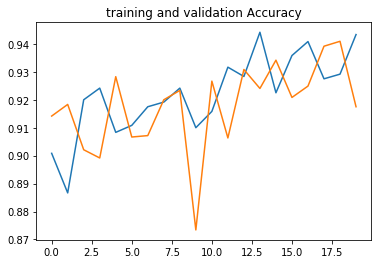

In [20]:
plt.plot(epochs,Accuracy)
plt.plot(epochs,Val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

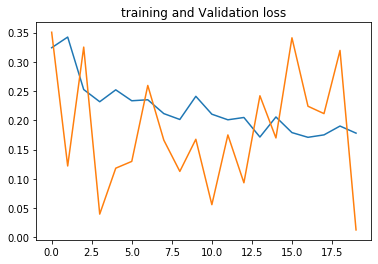

In [21]:
plt.plot(epochs,Loss)
plt.plot(epochs,Val_loss)
plt.title("training and Validation loss")
plt.show()

In [22]:
model.save("last_model.h5")

## PREDICTIONS

### IMAGE GENERATOR

In [23]:


Batch_size = 32
image_shape = 150



In [24]:
train_image_generator = ImageDataGenerator(
    # image augmentation
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True,
    rescale = 1./255 #normalize the image 
             )
test_image_generator = ImageDataGenerator(
    rescale = 1./255
             )


train_image_gen = train_image_generator.flow_from_directory(
batch_size = Batch_size,
directory = train_dir_predict,
shuffle = True,
target_size = (image_shape,image_shape),
class_mode= "binary")


test_image_gen =test_image_generator.flow_from_directory(
batch_size = Batch_size,
directory = test_dir,
shuffle = False,
target_size = (image_shape,image_shape),
class_mode= "binary")



Found 11000 images belonging to 2 classes.
Found 13745 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'coyotes': 0, 'dogs': 1}

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [27]:
image = load_img("DATA/18.jpg", target_size=(image_shape, image_shape)) # load image and resize

In [28]:
type(image)

PIL.Image.Image

In [29]:
img = img_to_array(image)

In [30]:
type(img)

numpy.ndarray

In [31]:
print(img.shape)

(150, 150, 3)


In [32]:
img = np.expand_dims(img, 0) # dimension

In [33]:
img = img.astype(np.float32)/255.0 # normalize 

In [34]:
print(img.shape)

(1, 150, 150, 3)


### PREDICT MODEL

In [35]:
model.predict(img)

array([[0.9990409]], dtype=float32)

In [36]:
img0 = load_img("DATA/2.jpg",target_size=(image_shape,image_shape))
img0 = img_to_array(img0)
img0 = np.expand_dims(img0,0)
img0 = img0.astype(np.float32)/255.0
model.predict(img0)

array([[0.9998462]], dtype=float32)

In [37]:
def load_images(folder):
    outputs = []
    for f in os.listdir(folder):
        print(f)
        img = load_img(os.path.join(folder, f),target_size=(image_shape,image_shape))
        img = img_to_array(img)
        img = np.expand_dims(img,0)
        img = img.astype(np.float32)/255.0
        outputs.append(img)
    return np.concatenate(outputs)

In [38]:


def predict_classes(model, images, classes):
    output = []
    prediction = model.predict(images)

    class_label = {value:key for key, value in classes.items()}
    for p in prediction:
        if p> 0.5:
            output.append(class_label[1])
        else:
            output.append(class_label[0])
    return output



###  NOW PLOT IMAGES

Dog


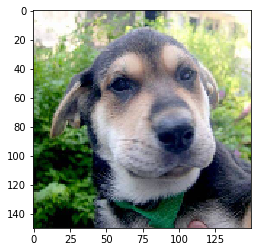

In [44]:
# result predict
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('./minicoyo/5.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Coyote")
plt.show()